In [1]:
import cv2
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [2]:
def skin_detection(img):
    
    skinLow = np.array([0,48,80],np.uint8)
    skinHigh = np.array([20,255,255],np.uint8)
    img = cv2.GaussianBlur(img,(5,5),0)
    imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(imgHSV,skinLow,skinHigh)
    result = cv2.bitwise_and(img,img,mask=mask)
    imgGray = cv2.cvtColor(result,cv2.COLOR_BGR2GRAY)
    
    return imgGray

In [3]:
winSize = (128,128)
blockSize = (16,16)
blockStride = (4,4)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,
                        derivAperture,winSigma,histogramNormType,
                        L2HysThreshold,gammaCorrection,nlevels)

In [4]:
img = pickle.load(open("img_save.p","rb"))

In [5]:
pre = []
hog_data = []
hog_data_flat = []

for n in img:
    pre.append(skin_detection(n))
for n in pre:
    hog_data.append(hog.compute(n))
for n in hog_data:
    hog_data_flat.append(n.flatten())

In [6]:
x = np.float32(hog_data_flat).reshape(-1,30276)
y = np.float32(np.repeat(np.arange(24),19)[:,np.newaxis])

In [38]:
x_Train = np.r_[x[4:19],x[23:38],x[42:57],x[61:76],x[80:95],
            x[99:114],x[118:133],x[137:152],x[156:171],x[175:190],
            x[194:209],x[213:228],x[232:247],x[251:266],x[270:285],
            x[289:304],x[308:323],x[327:342],x[346:361],x[365:380],
            x[384:399],x[403:418],x[422:437],x[441:456]]

x_Test = np.r_[x[0:4],x[19:23],x[38:42],x[57:61],x[76:80],
            x[95:99],x[114:118],x[133:137],x[152:156],x[171:175],
            x[190:194],x[209:213],x[228:232],x[247:251],x[266:270],
            x[285:289],x[304:308],x[323:327],x[342:346],x[361:365],
            x[380:384],x[399:403],x[418:422],x[437:441]]

y_Train = np.r_[y[4:19],y[23:38],y[42:57],y[61:76],y[80:95],
            y[99:114],y[118:133],y[137:152],y[156:171],y[175:190],
            y[194:209],y[213:228],y[232:247],y[251:266],y[270:285],
            y[289:304],y[308:323],y[327:342],y[346:361],y[365:380],
            y[384:399],y[403:418],y[422:437],y[441:456]]

y_Test = np.r_[y[0:4],y[19:23],y[38:42],y[57:61],y[76:80],
            y[95:99],y[114:118],y[133:137],y[152:156],y[171:175],
            y[190:194],y[209:213],y[228:232],y[247:251],y[266:270],
            y[285:289],y[304:308],y[323:327],y[342:346],y[361:365],
            y[380:384],y[399:403],y[418:422],y[437:441]]

In [39]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_Train,y_Train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
predict = clf.predict(x_Test)

from sklearn.metrics import accuracy_score

accuracy_score(y_Test,predict)

0.8541666666666666

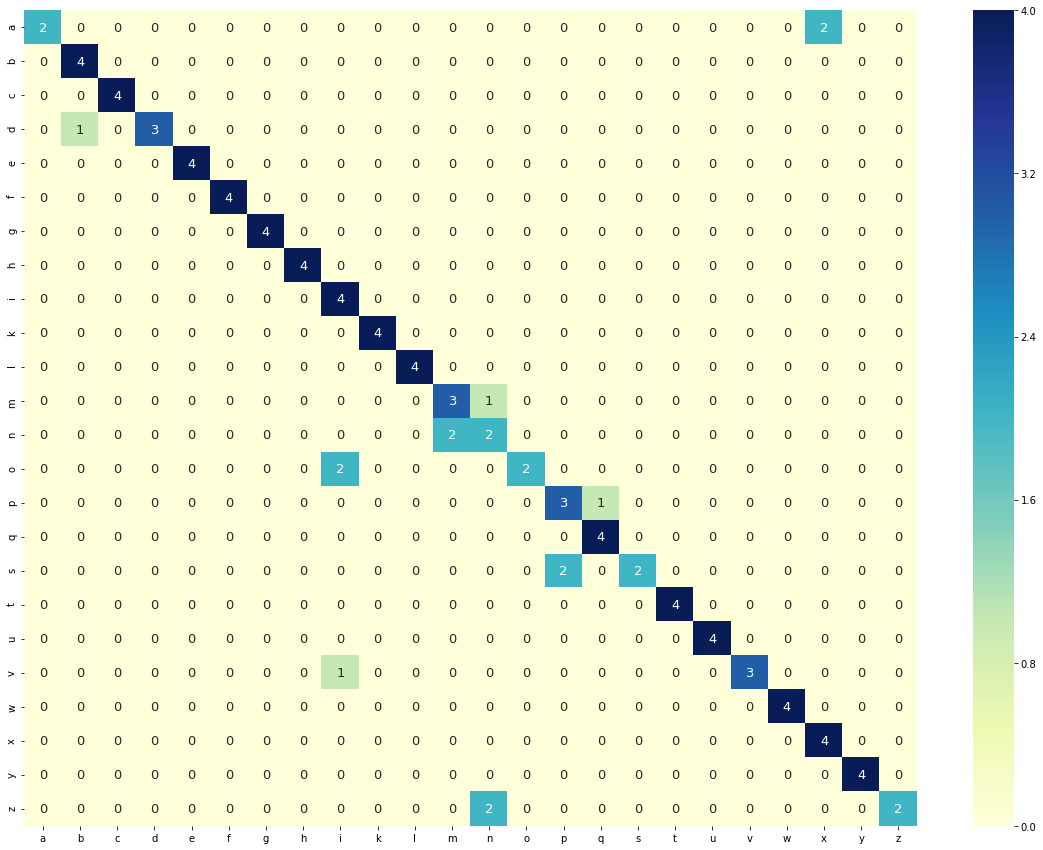

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd


alpabet = 'abcdefghiklmnopqstuvwxyz'


df_cm = pd.DataFrame(confusion_matrix(y_Test, predict), list(alpabet), list(alpabet))
plt.subplots(figsize=(20,15))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 13},cmap="YlGnBu")

plt.show()